# Tokyo Hostels

### Table of Contents:  
1. [Introduction/Business Understanding](#1.-Introduction/Business-Understanding)
2. [Analytic Approach](#2.-Analytic-Approach)
3. [Data Requirements](#3.-Data-Requirements)
4. [Data Preparation/Pre-processing](#4.-Data-Preparation/Pre-processing)
5. [Analysis](#5.-Analysis)
6. [Conclusion](#6.-Conclusion)

<img src="images/tokyo hostels.jpg" width="65%"/>

## 1. Introduction/Business Understanding

#### 1.1 Background

As someone who loves travelling but has yet to do enough of it, finding ways to save money and travel low-cost is extremely satisfying. That way, once I am able to find the time to travel, I can rest easy in the fact that I'm spending my money wisely.  There's little to save while booking flights and I'd rather pay more to traveling comfortably on a 16 hour flight than try to save and wear myself down even before the trip begins! But we can always save quite a bit mores on accomodation.

A hostel is a low-budget accommodation shared among travelers. Staying at hostels is an extremely affordable option for travelers. Not only that, It also gives you a chance to experience which you would never at a hotel. I've found that experiencing hostel life one of the best ways to travel the world on a budget and here’s why:

1. You'll save a lot of money trust me.
2. Meet other like-minded travellers and make new friends around the world!
3. Most hostels organize lot of social activites

#### 1.2 Problem Description:

Hostel accomodation is a booming industry with the latest rise in tourism worldwide, especially in Asia. Over 20% of the total tourists worldwide are aged between 19-25. And around 80% of them prefer to spend less on accomodation by opting for hostels. This means the demand for hostels is only going to grow further and more people would want to get into the business as well. 
- How should a new business person decide where to open a hostel?
- What factors should he look at before investing?
- Which neighborhood venues affect a user's rating for *location* of hostel?

At the same time, it is difficult for a travellers, especially first-timers, to select a hostel from among many options. Hostel reviews are subjective and differ from person-to-person and one cannot solely depend on them to make a decision. It is especially important to consider other aspects like price and neighborhood, which can greatly influence one's experience of the city/country.
I will try to answer the following questions 
- How does price vary with location?
- Where are the <i>'highest value'</i> hostels located?
- How does proximity to transportation affect hostel rating?
- Which hostels are most secure and where are they located?
- Suggest similar hostel but which cheaper price

Tourism in Japan in on a rise. It is expected that the number of foreign tourists coming to Japan will be increasing as soon as the current state of the world dissipates. When things go back to normal, people will want to know the safest, cleanest, and most valuable places to stay no matter where they go. I would like for this model to be able to be used in more places than just Tokyo of course. But for now, Tokyo is the main subject

#### 1.3 Target Audience

This project will serve two groups of audience:
1. **Travellers:** Help them make an informed decision while choosing a hostel by providing an in-depth analysis of hostels and their neighborhood.
2. **Business Person:** Provide useful information and models which can help them where to open their first/next hostel.

## 2. Analytic Approach
I will be taking two approaches in the project.

Firstly, I will use *exploratory data analysis(EDA)* to uncover hidden properties of data and provide useful insights to the reader, both future traveller and investor.

Secondly, I will use *prescriptive analytics* to help a business person decide a location for new hostel as well as travellers looking for the best accomodations they have in mind. I will use *clustering* (KMeans)

## 3. Data Requirements

One city will be analysed in this project : **Tokyo**.

Following are the datasets used in the project along with the reasons for choosing them:

**1. [Japan Hostel Dataset](https://www.kaggle.com/koki25ando/hostel-world-dataset)**: This dataset was web scraped from Hostelworld by Koki Ando and is available on Kaggle. This is the core dataset with which I'll work.

**2. [Foursquare API](https://developer.foursquare.com/docs/api)**: This API will help me get the venues around the hostel which I will use for EDA and clustering.

**3. [Tokyo Land Price](https://utinokati.com/en/details/land-market-value/area/Tokyo/)**: I will scrape this website to get land prices of various neighborhoods in Tokyo.

Firstly, I will use the list of hostels from *Hostel dataset* and use *Foursquare API* to get venues around the Hostel. I will then use EDA to explore the neighborhood and how it affects the price of the hostel. I will also use the combined dataset to cluster similar hostels as per pricing and neighborhood. 

Second, I will combine the above data with the land price for the area in which the Hostel is situated and them develop clustering and regression models to predict where a new hostel should be opened and how much should it be priced at.

 ## 4. Data Preparation/Pre-processing

Let's import all the dependencies before we begin. If we need more, we will add them at a later point. I'll first add whatever I can think of.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import json
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy import OpenCage
from sklearn.cluster import KMeans

%matplotlib inline

#### 4.1. Hostel Dataset:

Let's first deal with hostels datsaet. I will read the first dataset into a dataframe. For ease of access, I've already downloaded the dataset as csv from Kaggle. You can access the same [here](https://www.kaggle.com/koki25ando/hostel-world-dataset).

In [52]:
hostel_df = pd.read_csv('data/Hostel.csv')
hostel_df.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


We will drop the 1st column and rename other columns to make them more readable.

In [53]:
columns = ['Name', 'City', 'StartPrice', 'DistanceFromCityCentre', 'OverallScore', 
           'RatingCategory', 'Atmosphere', 'Cleanliness', 'Facilities', 'Location', 
           'Security', 'Staff', 'ValueForMoney', 'Longitude', 'Latitude']

In [54]:
hostel_df.drop(['Unnamed: 0'], axis=1, inplace=True)
hostel_df.columns = columns
hostel_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [55]:
print("Number of Hostels: ", hostel_df.shape[0])

Number of Hostels:  342


Let's check if any hostels are missing location data since that is essential for our analysis.

In [56]:
print("Num of hostels with missing Longitude: ", hostel_df.Longitude.isna().sum())

Num of hostels with missing Longitude:  44


In [57]:
print("Num of hostels with missing Latitude: ", hostel_df.Latitude.isna().sum())

Num of hostels with missing Latitude:  44


In [58]:
# Remove hostels with missing latitude and longitude 
hostel_df = hostel_df[hostel_df.Longitude.isna() == False]
hostel_df = hostel_df[hostel_df.Latitude.isna() == False]
hostel_df.shape

(298, 15)

If we see the DistanceFromCityCentre column, we see that it has distance as well as text, let's remove the unwanted text.

In [59]:
hostel_df.DistanceFromCityCentre = hostel_df.DistanceFromCityCentre.replace(r'[^\d\.]+', '', regex=True)
hostel_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384


Let's do a final check if any more values are missing and what we want to do about them

In [60]:
hostel_df.count()

Name                      298
City                      298
StartPrice                298
DistanceFromCityCentre    298
OverallScore              298
RatingCategory            298
Atmosphere                298
Cleanliness               298
Facilities                298
Location                  298
Security                  298
Staff                     298
ValueForMoney             298
Longitude                 298
Latitude                  298
dtype: int64

<br>No more missing values.  
Let's check the if the datatype of each column in proper

In [61]:
hostel_df.dtypes

Name                       object
City                       object
StartPrice                  int64
DistanceFromCityCentre     object
OverallScore              float64
RatingCategory             object
Atmosphere                float64
Cleanliness               float64
Facilities                float64
Location                  float64
Security                  float64
Staff                     float64
ValueForMoney             float64
Longitude                 float64
Latitude                  float64
dtype: object

In [62]:
# Convert DistanceFromCityCentre to float64
hostel_df.DistanceFromCityCentre = hostel_df.DistanceFromCityCentre.astype('float')
hostel_df.dtypes

Name                       object
City                       object
StartPrice                  int64
DistanceFromCityCentre    float64
OverallScore              float64
RatingCategory             object
Atmosphere                float64
Cleanliness               float64
Facilities                float64
Location                  float64
Security                  float64
Staff                     float64
ValueForMoney             float64
Longitude                 float64
Latitude                  float64
dtype: object

In [63]:
hostel_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384


Let's create a new dataframe for tokyo hostels.

In [64]:
tokyo_hostels_df = hostel_df[hostel_df.City == "Tokyo"]

<br>Everything looks good here. Let's move on to fetch neighborhood data using Foursquare API.

<br>  

#### 4.2 Neighborhood Data(Foursquare):

In [65]:
search_url = 'https://api.foursquare.com/v2/venues/search'
explore_url = 'https://api.foursquare.com/v2/venues/explore'

In [66]:
CLIENT_ID = 'LNXWLLYEOOO4XNUQFDVOQ4U4SJ42MCMEJ2VPN53ZODJJF0PC' # your Foursquare ID
CLIENT_SECRET = 'EAXHDYI3FODJ2LW0NYVG231JR4OE51UXYW5NV2CRIC10TFHZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [67]:
sample_hotel = hostel_df.loc[0]
sample_hotel.Name

'"Bike & Bed" CharinCo Hostel'

In [68]:
params = dict(
  client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET,
  v=VERSION,
  ll=f"{sample_hotel.Latitude}, {sample_hotel.Longitude}",
  radius=500,
  limit=100,
  sortByPopularity=1
)

In [69]:
def get_recommended_venues(name, latitude, longitude, limit=100, radius=500):
    venues = []
    params = dict(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        v=VERSION,
        ll=f"{latitude}, {longitude}",
        radius=radius,
        limit=limit,
        sortByPopularity=1
    )
    data = requests.get(explore_url, params=params).json()['response']['groups'][0]['items']
    for v in data:
        v = v['venue']
        primary_cat = ""
        for c in v['categories']:
            if(c['primary']):
                primary_cat=c['name']
        venues.append({
            'HostelName':name, 
            'VenueName': v['name'], 
            'Category': primary_cat, 
            'VenueLatitue': v['location']['lat'], 
            'VenueLongtitude': v['location']['lng']
        })
    return venues

In [70]:
venue_list = []

In [71]:
for name, lat, long in zip(hostel_df.Name, hostel_df.Latitude, hostel_df.Longitude):
    venue_list.extend(get_recommended_venues(name, lat, long))
    i = len(venue_list)
    print(i)

70
170
251
288
319
380
453
488
525
617
692
750
837
860
891
951
1051
1151
1251
1341
1441
1519
1567
1654
1752
1785
1837
1908
1920
1972
1993
2093
2193
2293
2393
2493
2593
2693
2730
2830
2919
3019
3119
3141
3241
3341
3441
3493
3540
3640
3698
3777
3821
3867
3967
4000
4036
4136
4159
4259
4334
4409
4474
4519
4588
4618
4718
4791
4864
4964
4988
5013
5112
5160
5203
5249
5329
5378
5478
5511
5524
5549
5571
5604
5663
5705
5742
5842
5872
5882
5928
6028
6082
6108
6151
6172
6228
6270
6296
6396
6420
6451
6498
6598
6698
6768
6826
6869
6915
6981
7036
7070
7113
7151
7219
7305
7388
7488
7558
7658
7699
7741
7793
7793
7816
7857
7928
7953
8009
8043
8076
8132
8177
8277
8377
8439
8485
8507
8607
8673
8761
8861
8914
9013
9073
9171
9218
9318
9412
9474
9513
9571
9602
9702
9766
9866
9966
10051
10109
10151
10201
10293
10313
10320
10420
10505
10536
10636
10688
10746
10819
10919
11019
11119
11207
11307
11407
11507
11582
11649
11693
11784
11807
11859


KeyboardInterrupt: 

In [72]:
venues_df = pd.DataFrame(venue_list)
venues_df = venues_df.rename(columns={'VenueLatitue': 'VenueLatitude', 'VenueLongtitude': 'VenueLongitude'})
venues_df.head()

,HostelName,VenueName,Category,VenueLatitude,VenueLongitude
0,"""Bike & Bed"" CharinCo Hostel",McDonald's (マクドナルド 地下鉄谷町四丁目店),Fast Food Restaurant,34.683109,135.517443
1,"""Bike & Bed"" CharinCo Hostel",7-Eleven (セブンイレブン 大阪谷町3丁目店),Convenience Store,34.683509,135.517793
2,"""Bike & Bed"" CharinCo Hostel",City Plaza Osaka (シティプラザ大阪),Hotel,34.684020,135.510206
3,"""Bike & Bed"" CharinCo Hostel",APA Villa Hotel Osaka-Tanimachi 4-chome Ekimae...,Hotel,34.681229,135.516472
4,"""Bike & Bed"" CharinCo Hostel",7-Eleven (セブンイレブン 大阪内久宝寺町４丁目店),Convenience Store,34.678857,135.514102


Let's create a new dataframe for venues for hostels in tokyo.

In [73]:
tokyo_venues_df = []
tokyo_venues_df = venues_df[venues_df.HostelName.isin(tokyo_hostels_df.Name)]

In [74]:
tokyo_venues_df.head()

,HostelName,VenueName,Category,VenueLatitude,VenueLongitude
70,&And Hostel Akihabara,Akihabara Station (秋葉原駅),Train Station,35.698357,139.773120
71,&And Hostel Akihabara,Yodobashi-Akiba (ヨドバシカメラ マルチメディアAkiba),Electronics Store,35.698713,139.774761
72,&And Hostel Akihabara,Akihabara Electric Town Exit (秋葉原駅 電気街口),Train Station,35.698818,139.772570
73,&And Hostel Akihabara,THE IDOLM@STER Official Shop (アイドルマスター オフィシャルシ...,Hobby Shop,35.698364,139.772298
74,&And Hostel Akihabara,Shosen Book Tower (書泉ブックタワー),Bookstore,35.697324,139.775157


In [75]:
tokyo_venues_df.shape

(5251, 5)

<br>

#### 4.3 Land Price Data:

I will scrape the following URL to get land prices in tokyo - https://utinokati.com/en/details/land-market-value/area/Tokyo/

In [76]:
land_price_url = 'https://utinokati.com/en/details/land-market-value/area/Tokyo/'

data = BeautifulSoup(requests.get(land_price_url).content)

In [77]:
price_df = pd.read_html(data.find('table', {'class':'table-condensed'}).prettify())[0]

In [78]:
price_df.drop(['#', 'Average Trading Price'], axis=1, inplace=True)
price_df.rename(columns={'Average Unit Price': 'PricePerSqMeter', 'Area': 'Neighborhood'}, inplace=True)
price_df.PricePerSqMeter = price_df.PricePerSqMeter.apply(lambda x: x.strip(' JPY/sq.m').replace(',', '')).astype(int)

In [79]:
price_df.head()

,Neighborhood,PricePerSqMeter
0,Chiyoda-Ku,2705898
1,Chuo-Ku,2699719
2,Minato-Ku,2121252
3,Shinjuku-Ku,939286
4,Bunkyo-Ku,945155


Let's see all the neighborhoods

In [80]:
print(price_df.Neighborhood.sort_values())

20              Adachi-Ku
47            Akiruno-Shi
29           Akishima-Shi
17             Arakawa-Ku
4               Bunkyo-Ku
0              Chiyoda-Ku
30              Chofu-Shi
1                 Chuo-Ku
22             Edogawa-Ku
28              Fuchu-Shi
38              Fussa-Shi
23           Hachioji-Shi
46             Hamura-Shi
42      Higashikurume-Shi
35    Higashimurayama-Shi
40      Higashiyamato-Shi
34               Hino-Shi
45              Inagi-Shi
18            Itabashi-Ku
21          Katsushika-Ku
16                Kita-Ku
41             Kiyose-Shi
33            Kodaira-Shi
32            Koganei-Shi
36          Kokubunji-Shi
39              Komae-Shi
7                 Koto-Ku
52         Kozushima-Mura
37          Kunitachi-Shi
31            Machida-Shi
9               Meguro-Ku
2               Minato-Ku
26             Mitaka-Shi
43    Musashimurayama-Shi
25          Musashino-Shi
13              Nakano-Ku
19              Nerima-Ku
51           Niijima-Mura
49          

Let's remove "-Ku" suffix from all the neighborhood names

In [81]:
price_df.Neighborhood.replace("(-Ku)", "", regex=True, inplace=True)

In [82]:
price_df.head()

,Neighborhood,PricePerSqMeter
0,Chiyoda,2705898
1,Chuo,2699719
2,Minato,2121252
3,Shinjuku,939286
4,Bunkyo,945155


The hostels dataset doesn't contain information on the locality of the hostel. We'll use reverse geocoding for this purpose. I'm using a free account on OpenCage for this purpose.

We'll try the API with one Hostel and then write function to do the same for all hostels in tokyo.

In [83]:
temp = tokyo_hostels_df.iloc[1]
temp.to_frame().T

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8,7.5,7.5,7.5,7,8,6.5,139.784,35.7127


In [84]:
from opencage.geocoder import OpenCageGeocode

geo = OpenCageGeocode("d3610d759590448a975a53a2ac5bbfb2")

In [85]:
results = geo.reverse_geocode(temp.Latitude, temp.Longitude)

In [86]:
results[0]['formatted']

'Yanaka, Taito, Tokyo 110-8766, Japan'

<br> Here we see it gives us the area and most importantly to us, the neighborhood in which this hostel is located. Now we can do this for each of our hostels to determine the area its located.

In [42]:
import time

address = []
for lat, long in zip(tokyo_hostels_df.Latitude, tokyo_hostels_df.Longitude):
    loc = geo.reverse_geocode(lat, long)[0]
    print(loc['formatted'])
    address.append(loc['formatted'])
    time.sleep(1)

3-chome, Chiyoda, Tokyo 101-0025, Japan
Yanaka, Taito, Tokyo 110-8766, Japan
Taito, Tokyo, Japan
Taito, Tokyo, Japan
328 Hostel&Lounge, 8 Shuto Expressway Route 1 Haneda Line, 2-chome, Ota, Tokyo 144-0043, Japan
Ace Inn Shinjuku, Yasukuni-dori, Shinjuku, Tokyo 162-0065, Japan
Aizuya-Inn, Yoshino-dori, Minami-Senju, Taito, Tokyo 111-0022, Japan
3-chome, Chiyoda, Tokyo 101-0024, Japan
Uehara, Shibuya, Tokyo 151-0062, Japan
Anne Hostel Asakusabashi, 2-21-14 Yanagibashi Ohashi-dori, Taito, Tokyo 111-0052, Japan
Takabatake Building 7, Kiyosumi-Dori, Kōtōbashi, Sumida, Tokyo 130-0015, Japan
Samezu, Daiichi Keihin, Shinagawa, Tokyo 140-0011, Japan
Asakusa Smile, Asakusa-dori, Kinshi, Sumida, Tokyo 130-0001, Japan
Taito, Tokyo, Japan
Taito, Tokyo, Japan
Taiyaki, New Nakamido, Asakusa, Taito, Tokyo 111-0032, Japan
洋包丁 高田馬場店, 高田馬場3-1-4 さかえ通り商店街, Kabukicho, Shinjuku, Tokyo 169-0075, Japan
K's House Tokyo, Kasuga-dori, Taito, Tokyo 111-0051, Japan
16 Sangyo doro, 1-chome, Ota, Tokyo 144-0043, Japa

In [87]:
neighborhood = []
for addr in address:
    for nb in price_df.Neighborhood:
        if nb.lower() in addr.lower():
            neighborhood.append(nb)
            break
    else:
        print("No nb found for ", addr)
        neighborhood.append(np.nan)


No nb found for  Kawasaki Ward, Kawasaki, Kanagawa Prefecture 210-0023, Japan
No nb found for  JGH Hostel., 35, Kawaguchi, 332-0026, Japan


We will remove these two hostels from our dataset since we don't have the name of their neighborhood.

In [88]:
print("Current number of hostels: ", tokyo_hostels_df.shape[0])

Current number of hostels:  116


In [89]:
tokyo_hostels_df['Neighborhood'] = neighborhood

<ipython-input-89-836258b14639>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokyo_hostels_df['Neighborhood'] = neighborhood


In [90]:
tokyo_hostels_df = tokyo_hostels_df[tokyo_hostels_df.Neighborhood.isna() == False]

In [91]:
print("New number of hostels: ", tokyo_hostels_df.shape[0])

New number of hostels:  114


In [92]:
tokyo_hostels_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,Neighborhood
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,Chiyoda
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,Taito
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,Taito
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384,Taito
6,328 Hostel & Lounge,Tokyo,3300,16.5,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044,Ota


#### 4.4 Persist all datasets for later use

In [93]:
hostel_df.to_pickle('data/hostels_cleaned.pkl')
venues_df.to_pickle('data/hostel_venues.pkl')
price_df.to_pickle('data/tokyo_land_prices.pkl')
tokyo_hostels_df.to_pickle('data/tokyo_hostels.pkl')
tokyo_venues_df.to_pickle('data/tokyo_hostels_venues.pkl')

<hr><br>

## 5. Analysis

### Loading data

In [150]:
hostel_df = pd.read_pickle('data/hostels_cleaned.pkl')
price_df = pd.read_pickle('data/tokyo_land_prices.pkl')
tokyo_hostels_df = pd.read_pickle('data/tokyo_hostels.pkl')
tokyo_venues_df = pd.read_pickle('data/tokyo_hostels_venues.pkl')
venues_df = pd.read_pickle('data/hostel_venues.pkl')

### 5.1 Exploratory Data Analysis
Using EDA, we will try to answer the following questions:
- How does price vary with location?
- Which hostels are most secure and where are they located?
- Where are the <i>'value of money'</i> hostels located?
- How does proximity to transportation affect hostel rating?

Let's first start by analyzing which cities are covered in our dataset

In [151]:
hostel_df.City.value_counts()

Tokyo           116
Osaka            89
Kyoto            66
Fukuoka-City     14
Hiroshima        13
Name: City, dtype: int64

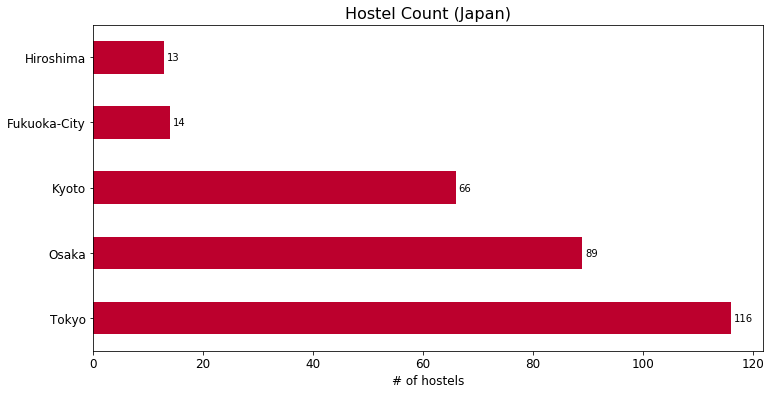

In [19]:
plt.figure(figsize=(12, 6))
ax = hostel_df.City.value_counts().plot(kind="barh", color="#BC002D", fontsize=12)
ax.set_title("Hostel Count (Japan)", fontsize=16)
ax.set_xlabel("# of hostels", fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() + 0.5, p.get_y() + 0.2))

<br>Tokyo has the most number of hostels which is understandable since it is once of the largest cities of the world and hence might attract a lot of visitors through its airport

<br>Going ahead, our focus will only be tokyo hostels

In [20]:
tokyo_hostels_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,Neighborhood
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,Chiyoda
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,Taito
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,Taito
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384,Taito
6,328 Hostel & Lounge,Tokyo,3300,16.5,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044,Ota


In [21]:
tokyo_hostels_df.shape

(114, 16)

<br>Let's visualize all these hostels on the map

In [22]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

# add markers to map
for lat, lng, label in zip(tokyo_hostels_df.Latitude, tokyo_hostels_df.Longitude, tokyo_hostels_df.Name):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='#BC002D',
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
tokyo_map

<hr><br>

#### Hostel Density

Let's visualize how many hostels are located in each neighborhood

In [23]:
hostels_density = tokyo_hostels_df.groupby('Neighborhood')['Name'].count().to_frame().reset_index()
hostels_density.columns = ['Neighborhood', 'Count']
hostels_density.sort_values(['Count'], ascending=False)[:5]

,Neighborhood,Count
15,Taito,39
3,Chuo,13
14,Sumida,11
2,Chiyoda,9
13,Shinjuku,9


In [24]:
import geopandas

hostels_density.Neighborhood = hostels_density.Neighborhood + ' Ku'
gdf = geopandas.read_file('data/tokyo.json')
gdf = gdf.merge(hostels_density, left_on="area", right_on="Neighborhood")
gdf.head()

,area,area_en,code,geometry,Neighborhood,Count
0,Adachi Ku,Tokubu,131211.0,"POLYGON ((139.82105 35.81508, 139.82168 35.814...",Adachi Ku,2
1,Bunkyo Ku,Tokubu,131059.0,"POLYGON ((139.76093 35.73221, 139.76100 35.732...",Bunkyo Ku,2
2,Chiyoda Ku,Tokubu,131016.0,"POLYGON ((139.77014 35.70535, 139.77017 35.705...",Chiyoda Ku,9
3,Taito Ku,Tokubu,131067.0,"POLYGON ((139.80971 35.72814, 139.80971 35.727...",Taito Ku,39
4,Shinagawa Ku,Tokubu,131091.0,"MULTIPOLYGON (((139.71920 35.64185, 139.71935 ...",Shinagawa Ku,2


In [25]:
import branca

colormap = branca.colormap.LinearColormap(
    colors=['#FFF9C4','#FFF176','#FFCA28','#FF9800','#D84315'],
    index=gdf['Count'].quantile([0.25, 0.5, 0.7, 0.9]),
    vmin=hostels_density.Count.min(),
    vmax=hostels_density.Count.max()
)

colormap.caption="Hostel Density in Tokyo"

In [26]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

gj = folium.GeoJson(
    gdf,
    style_function=lambda x: {'fillColor': colormap(x['properties']['Count']), 'color': '#000',
                                                    'weight':0.25, 'fillOpacity':0.75},
    tooltip=folium.GeoJsonTooltip(fields=['Neighborhood', 'Count'], 
                                  aliases=['Neighborhood', 'Num of Hostels'], 
                                  localize=True)
).add_to(tokyo_map)

tokyo_map

It is evident from the above map that __Taito__ and __Chuo__ are host to many hostels. Hostel density is highest in these neighborhoods

Let's checkout the most expensive neighborhoods and number of hostels in that region:

In [27]:
gdf_new = gdf[['Neighborhood', 'Count']]
gdf_new.Neighborhood = gdf.Neighborhood.str.strip(" Ku")
cnt_price_df = gdf_new.merge(price_df, on="Neighborhood").sort_values('PricePerSqMeter', ascending=False).reset_index(drop=True)
cnt_price_df.head()

c:\users\jc\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Neighborhood,Count,PricePerSqMeter
0,Chiyoda,9,2705898
1,Chuo,13,2699719
2,Minato,3,2121252
3,Shibuya,5,1360332
4,Taito,39,1064759


Let's checkout the least expensive neighborhoods and number of hostels in that region:

In [28]:
cnt_price_df.tail()

,Neighborhood,Count,PricePerSqMeter
9,Sumida,11,617190
10,Nakano,3,596154
11,Ota,4,560106
12,Edogawa,1,332511
13,Adachi,2,295750


Now, let's take a look at all the neighborhoods

In [29]:
cnt_price_df.sort_values(['Count', 'PricePerSqMeter'])

,Neighborhood,Count,PricePerSqMeter
12,Edogawa,1,332511
13,Adachi,2,295750
8,Setagaya,2,664106
6,Shinagawa,2,767398
5,Bunkyo,2,945155
10,Nakano,3,596154
2,Minato,3,2121252
11,Ota,4,560106
7,Toshima,4,731392
3,Shibuya,5,1360332


In [30]:
(1064759 - 617190) / 1028047

0.4353585001463941

- Sumida-Ku seems to be popular since it ranks third in the list of number of hostels and at the same time, it is the 4th cheapest neighborhood in our list
- The price of property(per sq. meter) in Sumita-Ku is almost 43% less than that in Taito-ku, which combined wih the fact that it is close to Taito-ku and has fewer hostels than Taito-ku, makes it an exciting prospect for new investors.

<hr><br>

##### Q. How does price vary with distance from city center?
As per me, the closer a hostel to the city center, the higher it's price. Let's see if we can prove that using data.

In [31]:
tokyo_hostels_df.StartPrice.value_counts()

2000       13
2500       12
2200       10
3000        8
3300        6
2400        6
1800        5
2600        5
2100        5
2300        4
3600        4
2900        4
1600        3
2700        3
3200        3
1500        3
3800        2
4000        2
1900        2
3700        2
4100        2
5400        1
3400        1
5500        1
7600        1
3500        1
6300        1
1003200     1
5200        1
1300        1
3900        1
Name: StartPrice, dtype: int64

We can see that one hostel has a very high starting price! Can a hostel charge 1003200 Yen? Doesn't seem likely. Hence, we will remove that row from the dataset.

In [32]:
tokyo_hostels_df = tokyo_hostels_df[tokyo_hostels_df.StartPrice < 1000000]

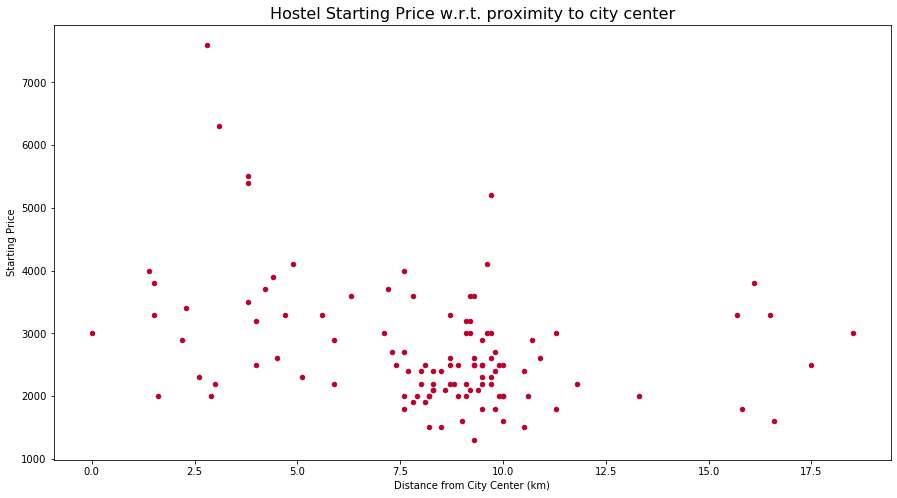

In [33]:
tokyo_hostels_df.plot(x='DistanceFromCityCentre', y='StartPrice', kind='scatter', figsize=(15, 8), color='#BC002D')
plt.xlabel("Distance from City Center (km)")
plt.ylabel("Starting Price")
plt.title("Hostel Starting Price w.r.t. proximity to city center", fontsize=16)
plt.show()

We cannot see any pattern which can help us verify our assumption. If our assumption was correct, we should be be seeing a curve which decreases as distance increases. However, there is no such curve visible.

Let's check the correlation score of StartPrice with DistanceFromCityCentre

In [34]:
tokyo_hostels_df[['StartPrice', 'DistanceFromCityCentre']].corr()

,StartPrice,DistanceFromCityCentre
StartPrice,1.00000,-0.32931
DistanceFromCityCentre,-0.32931,1.00000


The correlation coefficient is very small. Hence, we can say that the starting price of hostels does not vary according to its distance from the city center.

> **The starting price of hostels does not vary much depending on its distance from the city center.**

<hr><br>

##### Q. Which hostels are most secure and where are they located?
Having access to such important information through this dataset, we can use that to our advantage. If the client is looking for a much safer stay, we can then direct them to the safest stays possible!

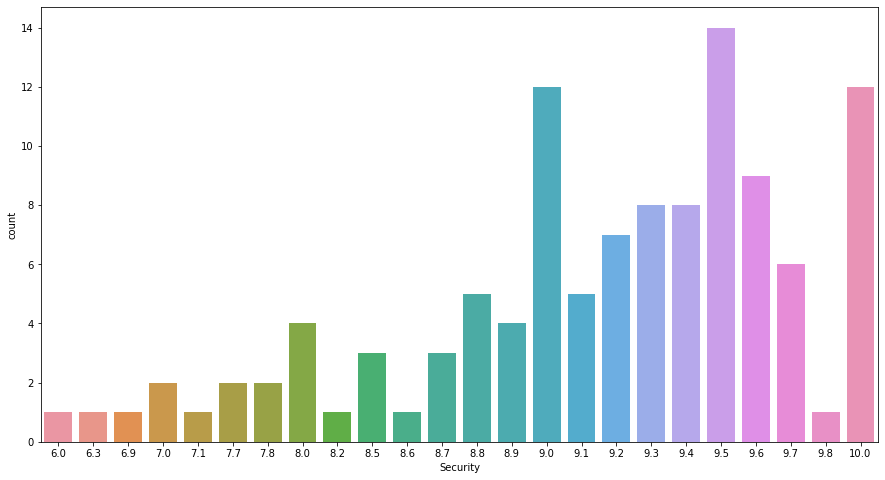

In [35]:
plt.figure(figsize=(15,8))
sns.countplot(x=tokyo_hostels_df.Security)

As we can see, most hostels are quite secure as rated by users, so that's some great news for travellers. Let's put hostels with security rating 9.0 and above on the map.

In [36]:
highsec_hostels = tokyo_hostels_df[tokyo_hostels_df.Security > 9]
lowsec_hostels = tokyo_hostels_df[tokyo_hostels_df.Security <= 9]


In [37]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

# add markers to map
for lat, lng, label in zip(highsec_hostels.Latitude, highsec_hostels.Longitude, highsec_hostels.Name):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='#33cc33',
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
# add markers to map
for lat, lng, label in zip(lowsec_hostels.Latitude, lowsec_hostels.Longitude, lowsec_hostels.Name):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='#BC002D',
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
tokyo_map

Let's try to visualize 

In [38]:
highsec_hostel_areas = highsec_hostels.groupby('Neighborhood')['Name'].count().to_frame().reset_index()
highsec_hostel_areas.rename(columns={'Name': 'Count'}, inplace=True)
highsec_hostel_areas['Total'] = tokyo_hostels_df[tokyo_hostels_df.Neighborhood.isin(highsec_hostel_areas.Neighborhood)].groupby('Neighborhood')['Name'].count().values

In [39]:
highsec_hostel_areas['% High Security'] = np.round(highsec_hostel_areas.Count/highsec_hostel_areas.Total, decimals=2)*100
highsec_hostel_areas.sort_values(['% High Security', 'Count'], ascending=False)

,Neighborhood,Count,Total,% High Security
9,Shibuya,5,5,100.0
4,Katsushika,3,3,100.0
1,Bunkyo,2,2,100.0
5,Kita,2,2,100.0
3,Chuo,11,13,85.0
12,Sumida,9,11,82.0
2,Chiyoda,6,9,67.0
6,Minato,2,3,67.0
13,Taito,25,39,64.0
0,Adachi,1,2,50.0


We can see that Shibuya, Katsushika, Bunkyo, and Kita have 100% safe hostels. Let's see them on a map and check if they are nearby.

In [40]:
highsec_gdf = gdf[gdf.Neighborhood.isin(highsec_hostel_areas[highsec_hostel_areas['% High Security']==100].Neighborhood + ' Ku')]
highsec_gdf

,area,area_en,code,geometry,Neighborhood,Count
1,Bunkyo Ku,Tokubu,131059.0,"POLYGON ((139.76093 35.73221, 139.76100 35.732...",Bunkyo Ku,2
7,Shibuya Ku,Tokubu,131130.0,"POLYGON ((139.68399 35.69199, 139.68445 35.692...",Shibuya Ku,5
8,Kita Ku,Tokubu,131172.0,"POLYGON ((139.69767 35.79845, 139.69828 35.798...",Kita Ku,2
14,Katsushika Ku,Tokubu,131229.0,"POLYGON ((139.85879 35.79444, 139.85899 35.794...",Katsushika Ku,3


In [41]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

gj = folium.GeoJson(
    highsec_gdf,
    style_function=lambda x: {'fillColor': '#BC002D', 'color': '#000',
                                                    'weight':0.25, 'fillOpacity':0.5},
    tooltip=folium.GeoJsonTooltip(fields=['Neighborhood', 'Count'], 
                                  aliases=['Neighborhood', 'Num of Hostels'], 
                                  localize=True)
).add_to(tokyo_map)

tokyo_map

> **Hostels with the very high security score are in Shibuya, Katsushika, Bunkyo, and Kita**

<hr><br>

##### Q. Where are the highest value hostels located?

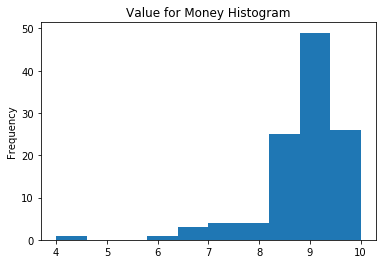

In [42]:
tokyo_hostels_df.ValueForMoney.plot(kind="hist")
plt.title("Value for Money Histogram")
plt.show()

Let's place hostels with highest 'value for money' rating

In [43]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)
high_vfm = tokyo_hostels_df[tokyo_hostels_df.ValueForMoney == 10]
low_vfm = tokyo_hostels_df[tokyo_hostels_df.ValueForMoney <= 8]

# add markers to map
for lat, lng, label in zip(high_vfm.Latitude, high_vfm.Longitude, high_vfm.Name):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#33cc33',
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
tokyo_map

In [44]:
low_vfm.StartPrice.mean()

3390.909090909091

In [45]:
high_vfm.StartPrice.mean()

2781.818181818182

In [46]:
print("Distance from city center:")
print("Low Value for money: ", round(low_vfm.DistanceFromCityCentre.mean(), 2))
print("High Value for money: ", round(high_vfm.DistanceFromCityCentre.mean(), 2))

Distance from city center:
Low Value for money:  7.76
High Value for money:  9.9


<br>
Let's visualize neighborhoods according to highest value score.

In [47]:
nbr_vfm = tokyo_hostels_df.groupby('Neighborhood')['ValueForMoney'].mean().reset_index()
nbr_vfm.Neighborhood =  nbr_vfm.Neighborhood + " Ku"
vfm_gdf = pd.merge(gdf, nbr_vfm, on='Neighborhood')
vfm_gdf.head()

,area,area_en,code,geometry,Neighborhood,Count,ValueForMoney
0,Adachi Ku,Tokubu,131211.0,"POLYGON ((139.82105 35.81508, 139.82168 35.814...",Adachi Ku,2,9.150000
1,Bunkyo Ku,Tokubu,131059.0,"POLYGON ((139.76093 35.73221, 139.76100 35.732...",Bunkyo Ku,2,8.850000
2,Chiyoda Ku,Tokubu,131016.0,"POLYGON ((139.77014 35.70535, 139.77017 35.705...",Chiyoda Ku,9,9.177778
3,Taito Ku,Tokubu,131067.0,"POLYGON ((139.80971 35.72814, 139.80971 35.727...",Taito Ku,39,8.979487
4,Shinagawa Ku,Tokubu,131091.0,"MULTIPOLYGON (((139.71920 35.64185, 139.71935 ...",Shinagawa Ku,2,8.650000


In [48]:
colormap = branca.colormap.LinearColormap(
    colors=['#FFF9C4', '#F0F4C3', '#DCE775','#689F38'],
    index=vfm_gdf['ValueForMoney'].quantile([0.1, 0.2, 0.75, 0.9]),
    vmin=hostels_density.Count.min(),
    vmax=hostels_density.Count.max()
)


In [49]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

gj = folium.GeoJson(
    vfm_gdf,
    style_function=lambda x: {'fillColor': colormap(x['properties']['ValueForMoney']), 'color': '#000',
                                                    'weight':0.25, 'fillOpacity':0.75},
    tooltip=folium.GeoJsonTooltip(fields=['Neighborhood', 'ValueForMoney'], 
                                  aliases=['Neighborhood', 'Value for Money'], 
                                  localize=True)
).add_to(tokyo_map)

tokyo_map

- **Highest value hostels are comparatively cheaper and are located away from the city center** 
- **Hostels in Chiyoda are near city center and have high value for money rating as well**

<hr><br>

##### Q. Cheap hostels near metro stations?

Let's check the frequency of each Venue Category

In [51]:
tokyo_venues_df.Category.value_counts()

Convenience Store        419
Ramen Restaurant         288
Café                     235
Sake Bar                 230
Japanese Restaurant      216
                        ... 
Hong Kong Restaurant       1
Kids Store                 1
Jewelry Store              1
Massage Studio             1
Korean BBQ Restaurant      1
Name: Category, Length: 260, dtype: int64

<br> Let's check the average number of venues per Hostel

In [52]:
tokyo_venues_df.groupby('HostelName').count()

,VenueName,Category,VenueLatitude,VenueLongitude
HostelName,,,,
&And Hostel Akihabara,100,100,100,100
&And Hostel Ueno,81,81,81,81
&And Hostel-Asakusa North-,37,37,37,37
1night1980hostel Tokyo,31,31,31,31
328 Hostel & Lounge,61,61,61,61
...,...,...,...,...
Khaosan Tokyo Origami,88,88,88,88
Khaosan Tokyo Samurai,100,100,100,100
Khaosan World Asakusa RYOKAN & HOSTEL,100,100,100,100


Let's extract the hostels which are close to Metro Stations.

In [53]:
metro_hostels = tokyo_venues_df[tokyo_venues_df.Category.str.contains(' Station')]

metro_hostels

,HostelName,VenueName,Category,VenueLatitude,VenueLongitude
70,&And Hostel Akihabara,Akihabara Station (秋葉原駅),Train Station,35.698357,139.773120
72,&And Hostel Akihabara,Akihabara Electric Town Exit (秋葉原駅 電気街口),Train Station,35.698818,139.772570
173,&And Hostel Ueno,Iriya Entrance (JR上野駅 入谷口),Train Station,35.714337,139.778622
228,&And Hostel Ueno,東京地下鉄 上野車両基地,Metro Station,35.714329,139.780421
692,Anne Hostel Asakusabashi,Ryōgoku Station (両国駅),Train Station,35.695838,139.793280
750,Anne Hostel Yokozuna,Ryōgoku Station (両国駅),Train Station,35.695838,139.793280
2294,Book And Bed Tokyo Ikebukuro,西武池袋駅 B1F改札口,Train Station,35.727878,139.710640
3821,Emblem Hostel Nishiarai,Nishiarai Station (TS13) (西新井駅),Train Station,35.777320,139.790400
5661,Guest House Shinagawa-shuku Tokyo,新馬場駅 北口,Train Station,35.617875,139.741282
9412,Ikidane House,Tabata Station (田端駅),Train Station,35.737832,139.761197


In [54]:
metro_hostels = tokyo_hostels_df[tokyo_hostels_df.Name.isin(metro_hostels.HostelName)]
metro_hostels.shape

(11, 16)

In [55]:
metro_hostels.RatingCategory.value_counts()

Superb       7
Fabulous     3
Very Good    1
Name: RatingCategory, dtype: int64

In [56]:
tokyo_hostels_df.RatingCategory.value_counts()

Superb       63
Fabulous     37
Very Good    11
Good          1
Rating        1
Name: RatingCategory, dtype: int64

In [57]:
print("Hostels located near a metro/train/bus station:")
print(f"{metro_hostels.RatingCategory.value_counts()['Fabulous']/metro_hostels.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

Hostels located near a metro/train/bus station:
27.27272727272727% were rated Fabulous


In [58]:
print("In general:")
print(f"{tokyo_hostels_df.RatingCategory.value_counts()['Fabulous']/tokyo_hostels_df.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

In general:
32.743362831858406% were rated Fabulous


We can observe above that 27% of the hostels near metro/train/bus stations were rated Fabulous compared to only 33% in general.

This shows that there is little to no correlation between the proximity to mode of transportation and the overall rating of the hostel. If any there might be slight negative correlation, but may be negligible as it's somewhat small in its impact.

> **The proximity of the hostel to any metro or train station has not much bearing on the rating of the hostel.**

<br>


##### Which neighborhood venues affect a user's rating for location of hostel?
Let's do a similar analysis for a few categories and see how it affects the user rating. 

We'll do similar analysis for *Convenience Store*, *Restaurant*, *Bar*, *Shopping Mall* categories

In [59]:
hostels_near_store = tokyo_hostels_df[
    tokyo_hostels_df.Name.isin(tokyo_venues_df.HostelName[tokyo_venues_df.Category.str.contains('store', case=False)])]

In [60]:
hostels_near_store.RatingCategory.value_counts()

Superb       37
Fabulous     24
Very Good     8
Name: RatingCategory, dtype: int64

In [61]:
print("Hostels located near a convenience store:")
print(f"{hostels_near_store.RatingCategory.value_counts()['Fabulous']/hostels_near_store.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

Hostels located near a convenience store:
34.78260869565217% were rated Fabulous


> **Travellers do not bother much about proximity to a convenience store doesn't since it doesn't seem to affect overall hostel rating.**

Let's check for public parks

In [62]:
hostels_near_mall = tokyo_hostels_df[
    tokyo_hostels_df.Name.isin(tokyo_venues_df.HostelName[tokyo_venues_df.Category.str.contains('park', case=False)])]

In [63]:
hostels_near_mall.RatingCategory.value_counts()

Superb       27
Fabulous     13
Very Good     3
Name: RatingCategory, dtype: int64

In [64]:
print("Hostels located near a mall:")
print(f"{hostels_near_mall.RatingCategory.value_counts()['Fabulous']/hostels_near_mall.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

Hostels located near a mall:
30.23255813953488% were rated Fabulous


> **Hostels with proximity to a park are rated the same as in general**

In [65]:
hostels_near_site = tokyo_hostels_df[
    tokyo_hostels_df.Name.isin(tokyo_venues_df.HostelName[tokyo_venues_df.Category.str.contains('Historic Site', case=False)])]

In [66]:
hostels_near_site.RatingCategory.value_counts()

Fabulous     5
Superb       4
Very Good    2
Name: RatingCategory, dtype: int64

In [67]:
print("Hostels located near a historic site:")
print(f"{hostels_near_site.RatingCategory.value_counts()['Fabulous']/hostels_near_site.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

Hostels located near a historic site:
45.45454545454545% were rated Fabulous


> **The proximity to historic sites and venues has a positive effect on the rating of the hostel.**

In [68]:
hostels_near_museum = tokyo_hostels_df[
    tokyo_hostels_df.Name.isin(tokyo_venues_df.HostelName[tokyo_venues_df.Category.str.contains('Museum', case=False)])]

In [69]:
hostels_near_museum.RatingCategory.value_counts()

Superb       8
Fabulous     6
Very Good    2
Name: RatingCategory, dtype: int64

In [70]:
print("Hostels located near a historic site:")
print(f"{hostels_near_museum.RatingCategory.value_counts()['Fabulous']/hostels_near_museum.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

Hostels located near a historic site:
37.5% were rated Fabulous


> **The proximity of the hostels nearby museums has a slightly higher than average rating.**

<hr>
<br>


### 5.2 Clustering

Now, we will cluster the hostels twice. Once depending on the different rating parameters and one based on their neighborhood.

Consider the following case, that a traveller has selected a hostel, but he finds that it is full! What options does he have? He/She can either go for a hostel which is similar in rating and price to the one he/she has selected. Or he/she can consider hostels which boast similar neighborhood to the selected one.

We will help traveller in both cases

#### 5.2.1 Clustering based on rating parameters

In [162]:
X = tokyo_hostels_df[['StartPrice', 'DistanceFromCityCentre', 'OverallScore', 
                      'Atmosphere', 'Cleanliness', 'Facilities', 'Location', 
                      'Security', 'Staff', 'ValueForMoney']]

In [172]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=10)
    km.fit(X)
    return km.inertia_

In [173]:
scores = [get_inertia(x) for x in range(2, 21)]

Text(0, 0.5, 'Error')

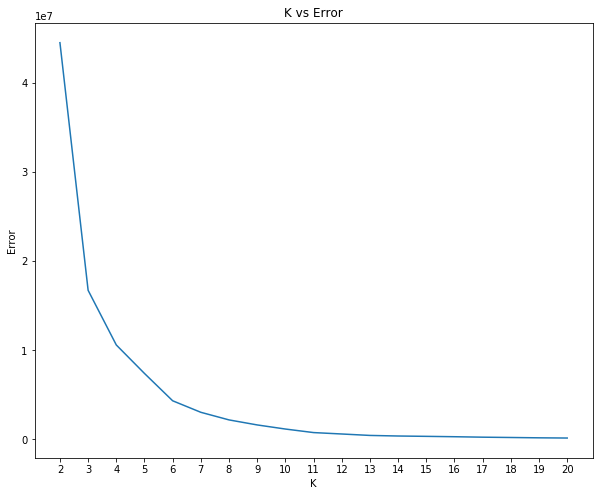

In [174]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores)
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

It is evident from the above plot that we have at most 6 or 7 clusters in our data. Let's retrain the model and plot the hostels on the map using 6 clusters

In [175]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [176]:
tokyo_hostels_df['RatingCluster'] = kmeans.labels_

In [177]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

# set color scheme for the clusters
x = np.arange(9)
ys = [i + x + (i*x)**2 for i in range(9)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
markers_colors = []
for lat, lng, name, cluster in zip(tokyo_hostels_df.Latitude, tokyo_hostels_df.Longitude, tokyo_hostels_df.Name, kmeans.labels_):
    label = folium.Popup(str(name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
tokyo_map

_**Examining Clusters**_

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. But we won't be doing it for all. We'll compare first two clusters for the sake of brevity.

##### Cluster 0

In [181]:
tokyo_hostels_df[tokyo_hostels_df.RatingCluster == 0].describe()

,StartPrice,DistanceFromCityCentre,OverallScore,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,RatingCluster
count,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.0
mean,2417.50000,8.560000,8.887500,8.205000,9.107500,8.767500,8.882500,9.150000,9.200000,8.89500,139.778235,35.701880,0.0
std,161.54304,2.504028,0.601361,1.145549,0.833709,0.772737,0.641667,0.639311,0.585728,0.78314,0.034174,0.024223,0.0
min,2200.00000,2.600000,7.400000,4.000000,6.000000,6.800000,6.800000,7.000000,7.300000,6.50000,139.668125,35.604242,0.0
25%,2275.00000,7.925000,8.600000,7.800000,8.900000,8.300000,8.675000,9.000000,9.000000,8.67500,139.775749,35.694450,0.0
50%,2450.00000,8.850000,9.000000,8.200000,9.300000,8.900000,9.000000,9.300000,9.350000,8.95000,139.785828,35.703397,0.0
75%,2500.00000,9.700000,9.300000,8.900000,9.600000,9.300000,9.300000,9.500000,9.600000,9.40000,139.794945,35.712317,0.0
max,2700.00000,17.500000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,139.869197,35.753926,0.0


**Traits: Very High Cost. Close to City center. Very high ratings all throughout.**

##### Cluster 4

In [182]:
tokyo_hostels_df[tokyo_hostels_df.RatingCluster == 4].describe()

,StartPrice,DistanceFromCityCentre,OverallScore,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,RatingCluster
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0
mean,1871.875000,9.187500,8.784375,8.281250,9.000000,8.671875,8.365625,9.134375,9.046875,9.000000,139.783072,35.713198,4.0
std,217.366014,2.777415,0.595201,0.860022,1.016318,0.806919,1.365381,0.652345,0.722444,0.594599,0.037779,0.021996,0.0
min,1300.000000,1.600000,7.000000,5.500000,6.000000,6.000000,4.000000,7.000000,6.500000,6.500000,139.667695,35.674781,4.0
25%,1800.000000,8.200000,8.700000,8.000000,8.975000,8.375000,8.375000,8.875000,8.900000,8.800000,139.777611,35.695129,4.0
50%,2000.000000,9.050000,9.000000,8.400000,9.300000,8.950000,8.900000,9.250000,9.250000,9.100000,139.786469,35.710312,4.0
75%,2000.000000,10.000000,9.100000,8.800000,9.525000,9.025000,9.100000,9.500000,9.400000,9.200000,139.796722,35.725175,4.0
max,2100.000000,16.600000,9.400000,10.000000,10.000000,10.000000,9.700000,10.000000,10.000000,10.000000,139.863871,35.778200,4.0


**Traits: Moderately High Cost. About 9km from city center on average. All ratings moderately high**

Now suppose that I want to stay at _**Retrometro Backpackers**_. However, when I go to book, it shows that it doesn't have any spots available! Fortunately, I can now use the cluster result to find a hostel similar to Retrometro Backpackers. Let's see what options do I have!

In [184]:
tokyo_hostels_df[tokyo_hostels_df.Name.str.contains("Retrometro")]

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,Neighborhood,RatingCluster
275,Retrometro Backpackers,Tokyo,3000,9.2,9.4,Superb,9.4,9.4,9.0,9.4,9.5,9.8,9.6,139.789362,35.713157,Taito,3


Retrometro Backpackers' RatingCluster is 3. Let's see what options do I have!

In [186]:
tokyo_hostels_df[tokyo_hostels_df.RatingCluster == 3].sort_values(['OverallScore'], ascending=False)[:5]

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,Neighborhood,RatingCluster
132,Hostel bedgasm,Tokyo,2900,9.5,9.6,Superb,9.6,9.8,9.6,9.1,9.5,9.9,9.7,139.789033,35.721350,Taito,3
329,Unplan Kagurazaka,Tokyo,3200,4.0,9.5,Superb,9.2,9.9,9.6,8.8,9.6,9.8,9.6,139.731323,35.705065,Shinjuku,3
275,Retrometro Backpackers,Tokyo,3000,9.2,9.4,Superb,9.4,9.4,9.0,9.4,9.5,9.8,9.6,139.789362,35.713157,Taito,3
227,Lyuro Tokyo Kiyosumi -The Share Hotels-,Tokyo,3200,9.1,9.4,Superb,9.3,10.0,10.0,7.3,10.0,9.3,10.0,139.792066,35.681217,Sumida,3
6,328 Hostel & Lounge,Tokyo,3300,16.5,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044,Ota,3


- Fortunately I can book a bed at Hostel bedgasm! It is similarly priced and rated as Retrometro Backpackers!

- We can do the same for the other 5 clusters as well, but we are not doing that now.

<hr><br>

#### 5.2.2 Clustering based on neighborhood

Now, we will cluster the same hostels. But this time, we will not use ratings or price instead we will use the neighborhood data and see which hostels have similar surroundings. Some travellers focus more on the location of a place rather than the price or ratings. This can be useful for them.

We will do one-hot encoding for the Category column to convert them to features

In [152]:
category_1hot = pd.get_dummies(tokyo_venues_df.Category)
category_1hot['HostelName'] = tokyo_venues_df.HostelName

# move neighborhood column to the first column
fixed_columns = [category_1hot.columns[-1]] + list(category_1hot.columns[:-1])
category_1hot = category_1hot[fixed_columns]
category_1hot.head()

,HostelName,ATM,Adult Boutique,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vietnamese Restaurant,Wagashi Place,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoshoku Restaurant,Zoo,Zoo Exhibit
70,&And Hostel Akihabara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,&And Hostel Akihabara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,&And Hostel Akihabara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,&And Hostel Akihabara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,&And Hostel Akihabara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
category_1hot.shape

(5251, 261)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [154]:
category_1hot = category_1hot.groupby('HostelName').mean().reset_index()
category_1hot.head()

,HostelName,ATM,Adult Boutique,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vietnamese Restaurant,Wagashi Place,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoshoku Restaurant,Zoo,Zoo Exhibit
0,&And Hostel Akihabara,0.000000,0.01,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.01,0.01,0.0,0.000000,0.0,0.010000,0.0,0.0
1,&And Hostel Ueno,0.000000,0.00,0.012346,0.0,0.0,0.0,0.0,0.0,0.024691,...,0.0,0.0,0.00,0.00,0.0,0.012346,0.0,0.012346,0.0,0.0
2,&And Hostel-Asakusa North-,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0
3,1night1980hostel Tokyo,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.032258,0.0,0.0
4,328 Hostel & Lounge,0.016393,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0


Let's see few Hostels along with the top 5 most common venues

In [155]:
num_top_venues = 5

for nbrhood in category_1hot.HostelName[:5]:
    print("---- "+nbrhood+" ----")
    temp = category_1hot[category_1hot.HostelName == nbrhood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- &And Hostel Akihabara ----
                venue  freq
0            Sake Bar  0.14
1    Ramen Restaurant  0.09
2           BBQ Joint  0.04
3          Hobby Shop  0.03
4  Chinese Restaurant  0.03


---- &And Hostel Ueno ----
                venue  freq
0   Convenience Store  0.17
1    Ramen Restaurant  0.10
2               Hotel  0.05
3  Chinese Restaurant  0.04
4         Coffee Shop  0.04


---- &And Hostel-Asakusa North- ----
               venue  freq
0  Convenience Store  0.19
1              Hotel  0.16
2           Sake Bar  0.11
3             Hostel  0.05
4               Park  0.05


---- 1night1980hostel Tokyo ----
               venue  freq
0  Convenience Store  0.19
1             Hostel  0.10
2       Intersection  0.10
3      Grocery Store  0.10
4           Sake Bar  0.03


---- 328 Hostel & Lounge ----
                 venue  freq
0    Convenience Store  0.13
1                Hotel  0.10
2     Ramen Restaurant  0.08
3  Japanese Restaurant  0.08
4                 Café  0.07

##### Let's put that into a pandas dataframe

In [156]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [157]:
indicators = ['st', 'nd', 'rd']
num_top_venues = 10

# create columns according to number of top venues
columns = ['HostelName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nbr_venues_sorted_df = pd.DataFrame(columns=columns)
nbr_venues_sorted_df['HostelName'] = category_1hot.HostelName

for ind in np.arange(category_1hot.shape[0]):
    nbr_venues_sorted_df.iloc[ind, 1:] = return_most_common_venues(category_1hot.iloc[ind, :], num_top_venues)

nbr_venues_sorted_df.head()

,HostelName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,&And Hostel Akihabara,Sake Bar,Ramen Restaurant,BBQ Joint,Sushi Restaurant,Soba Restaurant,Café,Pub,Hobby Shop,Chinese Restaurant,Japanese Curry Restaurant
1,&And Hostel Ueno,Convenience Store,Ramen Restaurant,Hotel,Chinese Restaurant,Café,Coffee Shop,Japanese Restaurant,Arts & Crafts Store,Bed & Breakfast,Bath House
2,&And Hostel-Asakusa North-,Convenience Store,Hotel,Sake Bar,Hostel,Park,Unagi Restaurant,Soba Restaurant,Bookstore,Bed & Breakfast,Motel
3,1night1980hostel Tokyo,Convenience Store,Grocery Store,Intersection,Hostel,Japanese Family Restaurant,Chinese Restaurant,Soba Restaurant,Bed & Breakfast,Bath House,Supermarket
4,328 Hostel & Lounge,Convenience Store,Hotel,Japanese Restaurant,Ramen Restaurant,Café,Sake Bar,Motorcycle Shop,Outdoor Sculpture,Platform,Bus Stop


#### Clustering Neighborhoods

Let's cluster neighborhoods into 2 types based on venue categories.

In [158]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = category_1hot.drop(['HostelName'], axis=1)
X.head()

,ATM,Adult Boutique,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vietnamese Restaurant,Wagashi Place,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoshoku Restaurant,Zoo,Zoo Exhibit
0,0.000000,0.01,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.01,0.01,0.0,0.000000,0.0,0.010000,0.0,0.0
1,0.000000,0.00,0.012346,0.0,0.0,0.0,0.0,0.0,0.024691,0.0,...,0.0,0.0,0.00,0.00,0.0,0.012346,0.0,0.012346,0.0,0.0
2,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.032258,0.0,0.0
4,0.016393,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0


In [159]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=15,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=8, tol=0.0001, verbose=0)

In [160]:
nbr_venues_sorted_df['Cluster'] = kmeans.labels_
nbr_venues_sorted_df.rename(columns={'HostelName': 'Name'}, inplace=True)

In [161]:
tokyo_hostels_df_merged = pd.merge(tokyo_hostels_df, nbr_venues_sorted_df, on='Name')
tokyo_hostels_df_merged.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
0,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,...,Ramen Restaurant,BBQ Joint,Sushi Restaurant,Soba Restaurant,Café,Pub,Hobby Shop,Chinese Restaurant,Japanese Curry Restaurant,2
1,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,...,Ramen Restaurant,Hotel,Chinese Restaurant,Café,Coffee Shop,Japanese Restaurant,Arts & Crafts Store,Bed & Breakfast,Bath House,1
2,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,...,Hotel,Sake Bar,Hostel,Park,Unagi Restaurant,Soba Restaurant,Bookstore,Bed & Breakfast,Motel,1
3,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,...,Grocery Store,Intersection,Hostel,Japanese Family Restaurant,Chinese Restaurant,Soba Restaurant,Bed & Breakfast,Bath House,Supermarket,1
4,328 Hostel & Lounge,Tokyo,3300,16.5,9.3,Superb,8.7,9.7,9.3,9.1,...,Hotel,Japanese Restaurant,Ramen Restaurant,Café,Sake Bar,Motorcycle Shop,Outdoor Sculpture,Platform,Bus Stop,1


__*Finally, let's visualize the resulting clusters*__

In [162]:
# create map
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

# set color scheme for the clusters
x = np.arange(9)
ys = [i + x + (i*x)**2 for i in range(9)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_hostels_df_merged['Latitude'], tokyo_hostels_df_merged['Longitude'], tokyo_hostels_df_merged['Name'], tokyo_hostels_df_merged['Cluster']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster) + ')', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.7).add_to(tokyo_map)

In [163]:
tokyo_map

##### Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

**Cluster 0**

In [170]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 0, tokyo_hostels_df_merged.columns[[0] + list(range(16, tokyo_hostels_df_merged.shape[1]))]][:5]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
13,Asakusa Hostel Toukaisou,Coffee Shop,Convenience Store,Ramen Restaurant,Café,Hotel,Wagashi Place,Unagi Restaurant,Chinese Restaurant,Japanese Restaurant,Bed & Breakfast,0
14,Asakusa Ryokan Toukaisou,Coffee Shop,Convenience Store,Ramen Restaurant,Café,Hotel,Wagashi Place,Unagi Restaurant,Chinese Restaurant,Japanese Restaurant,Bed & Breakfast,0
15,Asakusahotel Wasou,Coffee Shop,Café,Unagi Restaurant,Ramen Restaurant,Japanese Restaurant,Wagashi Place,Yoshoku Restaurant,Soba Restaurant,Sukiyaki Restaurant,Steakhouse,0
19,Book And Bed Tokyo Asakusa,Ramen Restaurant,Café,Unagi Restaurant,Coffee Shop,Japanese Restaurant,Wagashi Place,Soba Restaurant,Yoshoku Restaurant,Bed & Breakfast,Convenience Store,0
21,Bunka Hostel Tokyo,Ramen Restaurant,Coffee Shop,Café,Unagi Restaurant,Convenience Store,Dessert Shop,Wagashi Place,Japanese Restaurant,Yoshoku Restaurant,Sukiyaki Restaurant,0


In [171]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 0]['1st Most Common Venue'].value_counts()

Coffee Shop            6
Ramen Restaurant       5
Dessert Shop           1
Zoo Exhibit            1
Japanese Restaurant    1
Name: 1st Most Common Venue, dtype: int64

> **1st Cluster Properties: Cafe's and Ramen Shops**

In [172]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 1, tokyo_hostels_df_merged.columns[[0] + list(range(16, tokyo_hostels_df_merged.shape[1]))]][:5]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
1,&And Hostel Ueno,Convenience Store,Ramen Restaurant,Hotel,Chinese Restaurant,Café,Coffee Shop,Japanese Restaurant,Arts & Crafts Store,Bed & Breakfast,Bath House,1
2,&And Hostel-Asakusa North-,Convenience Store,Hotel,Sake Bar,Hostel,Park,Unagi Restaurant,Soba Restaurant,Bookstore,Bed & Breakfast,Motel,1
3,1night1980hostel Tokyo,Convenience Store,Grocery Store,Intersection,Hostel,Japanese Family Restaurant,Chinese Restaurant,Soba Restaurant,Bed & Breakfast,Bath House,Supermarket,1
4,328 Hostel & Lounge,Convenience Store,Hotel,Japanese Restaurant,Ramen Restaurant,Café,Sake Bar,Motorcycle Shop,Outdoor Sculpture,Platform,Bus Stop,1
6,Aizuya Inn,Convenience Store,Hotel,Sake Bar,Hostel,Intersection,Park,Japanese Curry Restaurant,Bath House,Historic Site,Motel,1


In [173]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 1]['1st Most Common Venue'].value_counts()

Convenience Store    24
Name: 1st Most Common Venue, dtype: int64

> **2nd Cluster Properties: Convenience Stores**

In [174]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 2, tokyo_hostels_df_merged.columns[[0] + list(range(16, tokyo_hostels_df_merged.shape[1]))]][:5]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster
0,&And Hostel Akihabara,Sake Bar,Ramen Restaurant,BBQ Joint,Sushi Restaurant,Soba Restaurant,Café,Pub,Hobby Shop,Chinese Restaurant,Japanese Curry Restaurant,2
5,Ace Inn Shinjuku,Convenience Store,Sake Bar,Ramen Restaurant,BBQ Joint,Bar,Japanese Restaurant,Italian Restaurant,Tonkatsu Restaurant,Steakhouse,Café,2
7,Akihabara Hotel 3000,Sake Bar,Ramen Restaurant,Soba Restaurant,Tonkatsu Restaurant,Café,Japanese Restaurant,BBQ Joint,Japanese Curry Restaurant,Steakhouse,Grocery Store,2
8,Almond hostel & cafe Shibuya,Café,Italian Restaurant,Sake Bar,French Restaurant,Park,Bakery,Portuguese Restaurant,Japanese Restaurant,Dumpling Restaurant,Pastry Shop,2
9,Anne Hostel Asakusabashi,Café,Yoshoku Restaurant,Bar,Convenience Store,Sake Bar,BBQ Joint,Thai Restaurant,Indian Restaurant,Tempura Restaurant,Steakhouse,2


In [175]:
tokyo_hostels_df_merged.loc[tokyo_hostels_df_merged['Cluster'] == 2]['1st Most Common Venue'].value_counts()

Convenience Store            8
Sake Bar                     7
Café                         4
Ramen Restaurant             4
Japanese Restaurant          3
Intersection                 2
Japanese Curry Restaurant    1
Chinese Restaurant           1
Korean Restaurant            1
BBQ Joint                    1
Name: 1st Most Common Venue, dtype: int64

> **3rd Cluster Properties: Strip Mall**

## 6. Conclusion

We got a glimpse of the hostel scene in Tokyo and were able to find out some interesting insights which might be useful to travellers as well as people with business interests. Let's summarize our findings:

- Most hostels are located in Taito-ku and Chuo-ku.
- Sumita-ku seems to be an interesting locality since it is close to Taito-ku and 43% cheaper than Taito-ku.
- The starting price of hostels does not vary much depending on its distance from the city center.
- Most of the hostels rated high for their security are in Shibuya, Katsushika, Bunkyo, and Kita
- Proximity to a mode of transportation does not affect ratings, but proximity to historic sites or museums postively affects them
- Hostels rated highly for being the highest value are comparatively cheaper and are located away from the city center

In addition, we also clustered the hostels, first based on the different rating parameters, and second based on the neighborhood of the hostels. It can useful for travellers to identify an alternate hostel if the one they are staying is too expensive, has not enough room to accomodate them, or many other reasons. The clusters can then be used to show which hostels in that cluster are the least expensive, safest, cleanest, and closest to the type of venues the traveller is looking to go.

To further this research, I would pursue using different models for the clustering and seeing how that would affect the data. Also would like to further diversify clusters in our final stage of clustering to hopefully identify more specific hostels with the kinds of venues that a traveller might specifically look for.

Furthermore, this model can be extended to all of Japan with the data available, so including both Osaka and Kyoto as well could prove to be a more in depth study of hostels in Japan. Additionally, if hostels around the world had the same type of rating system, I would love to apply the same models shown here to other areas of the world and compare them to one another.